In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.gridspec as gridspec
import seaborn as sns
import geopandas as gpd
import math
import textwrap

In [2]:
feature_data=gpd.read_file("ala_metrics.json")

In [3]:
line_color=['purple','green','goldenrod']
palette = sns.color_palette("Set2", 12).as_hex()[3:6]
palette_dark=['purple','green','goldenrod']

from matplotlib.colors import ListedColormap
my_cmap = ListedColormap([palette[0],palette[1],palette[2]])

my_map_darker= ListedColormap([line_color[0],line_color[1],line_color[2]])

In [4]:
only_milan=gpd.read_file("zip_milan.json")

<AxesSubplot:>

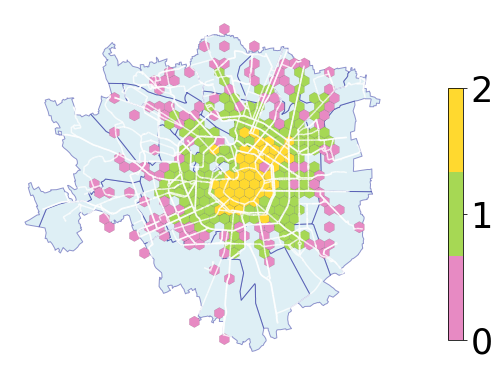

In [5]:
street=gpd.read_file("street.geojson")
street.to_crs("EPSG:3395")
fig, ax = plt.subplots(figsize = (7,7))
only_milan.to_crs("EPSG:3395").plot(ax=ax,alpha=0.4,color='lightblue',edgecolor='darkblue')
#'face'
feature_data.to_crs("EPSG:3395").plot(column='cluster',legend=False,cmap=my_cmap,ax=ax,vmin=0,vmax=3,edgecolor='black', linewidth=0.08)
plt.axis('off')
cax = fig.add_axes([1, 0.2, 0.03, 0.5])
sm = plt.cm.ScalarMappable(cmap=my_cmap, norm=plt.Normalize(vmin=0, vmax=2))
sm._A = []
cbr = fig.colorbar(sm, cax=cax,)
cbr.ax.tick_params(labelsize=35) 
street.to_crs("EPSG:3395").plot(ax=ax,zorder=1,alpha=0.8,color='white')

In [6]:
f_visita=feature_data.drop(['cluster','grid_id','geometry'],axis=1).columns

In [7]:
VARIABLES_=['Schools',"Value's buildings",'Rating','Price',\
            "Price's diversity","Category's diversity",'Supermarket diversity',\
            'Supermarkets','Velocity score','Fitness']

In [8]:

class SeabornFig2Grid():

    def __init__(self, seaborngrid, fig,  subplot_spec):
        self.fig = fig
        self.sg = seaborngrid
        self.subplot = subplot_spec
        if isinstance(self.sg, sns.axisgrid.FacetGrid) or \
            isinstance(self.sg, sns.axisgrid.PairGrid):
            self._movegrid()
        elif isinstance(self.sg, sns.axisgrid.JointGrid):
            self._movejointgrid()
        self._finalize()

    def _movegrid(self):
        """ Move PairGrid or Facetgrid """
        self._resize()
        n = self.sg.axes.shape[0]
        m = self.sg.axes.shape[1]
        self.subgrid = gridspec.GridSpecFromSubplotSpec(n,m, subplot_spec=self.subplot)
        for i in range(n):
            for j in range(m):
                self._moveaxes(self.sg.axes[i,j], self.subgrid[i,j])

    def _movejointgrid(self):
        """ Move Jointgrid """
        h= self.sg.ax_joint.get_position().height
        h2= self.sg.ax_marg_x.get_position().height
        r = int(np.round(h/h2))
        self._resize()
        self.subgrid = gridspec.GridSpecFromSubplotSpec(r+1,r+1, subplot_spec=self.subplot)

        self._moveaxes(self.sg.ax_joint, self.subgrid[1:, :-1])
        self._moveaxes(self.sg.ax_marg_x, self.subgrid[0, :-1])
        self._moveaxes(self.sg.ax_marg_y, self.subgrid[1:, -1])

    def _moveaxes(self, ax, gs):
        #https://stackoverflow.com/a/46906599/4124317
        ax.remove()
        ax.figure=self.fig
        self.fig.axes.append(ax)
        self.fig.add_axes(ax)
        ax._subplotspec = gs
        ax.set_position(gs.get_position(self.fig))
        ax.set_subplotspec(gs)

    def _finalize(self):
        plt.close(self.sg.fig)
        self.fig.canvas.mpl_connect("resize_event", self._resize)
        self.fig.canvas.draw()

    def _resize(self, evt=None):
        self.sg.fig.set_size_inches(self.fig.get_size_inches())


<Figure size 216x432 with 0 Axes>

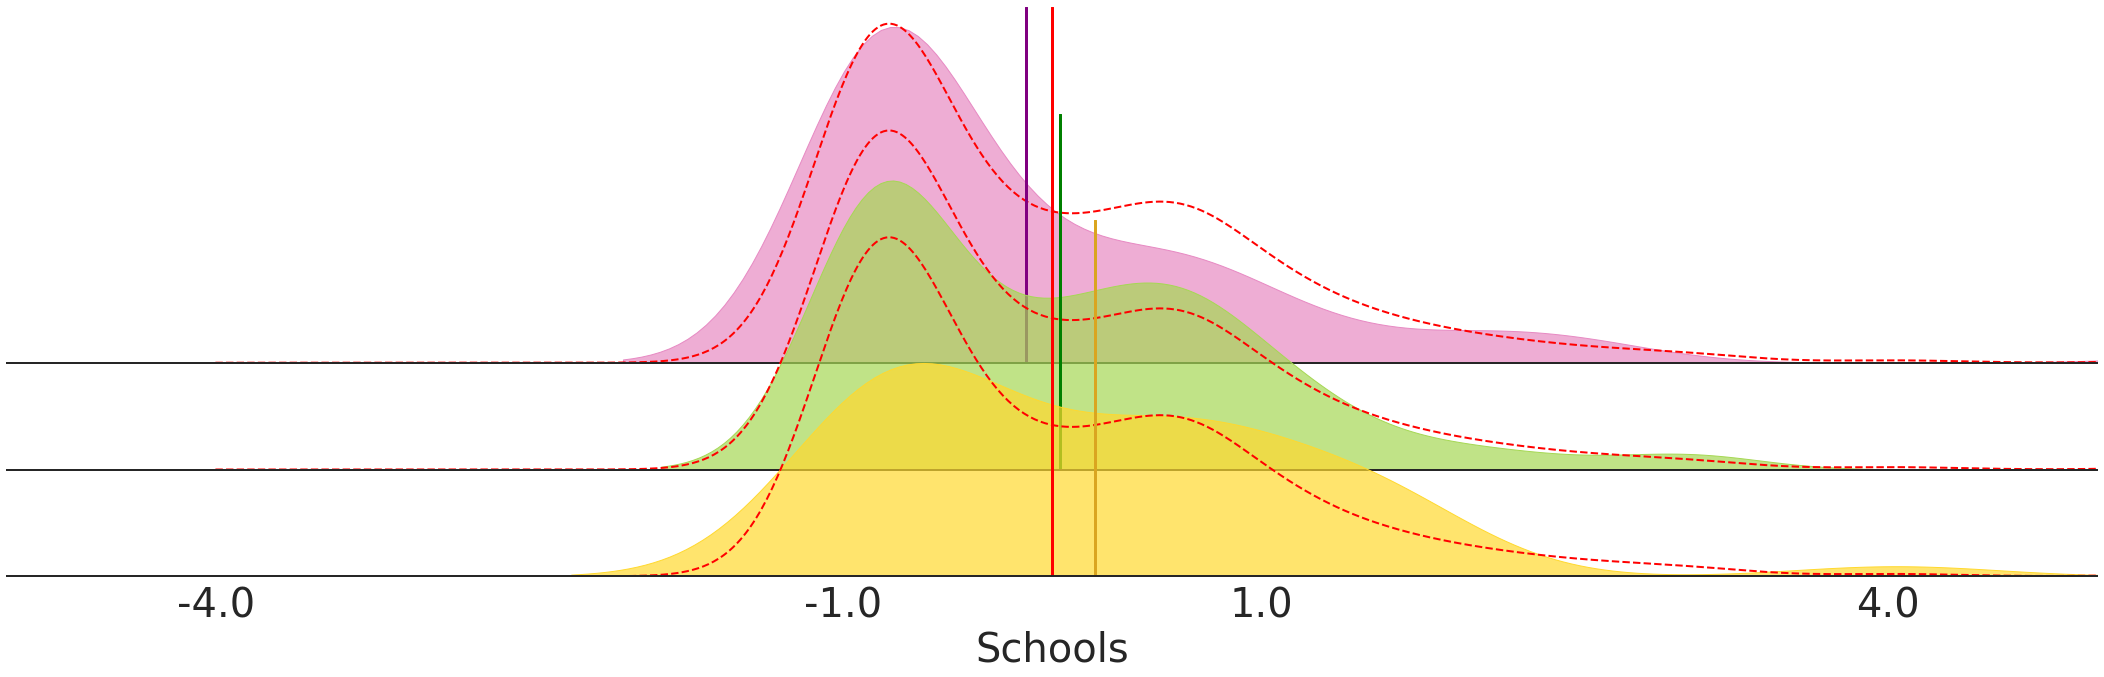

<Figure size 216x432 with 0 Axes>

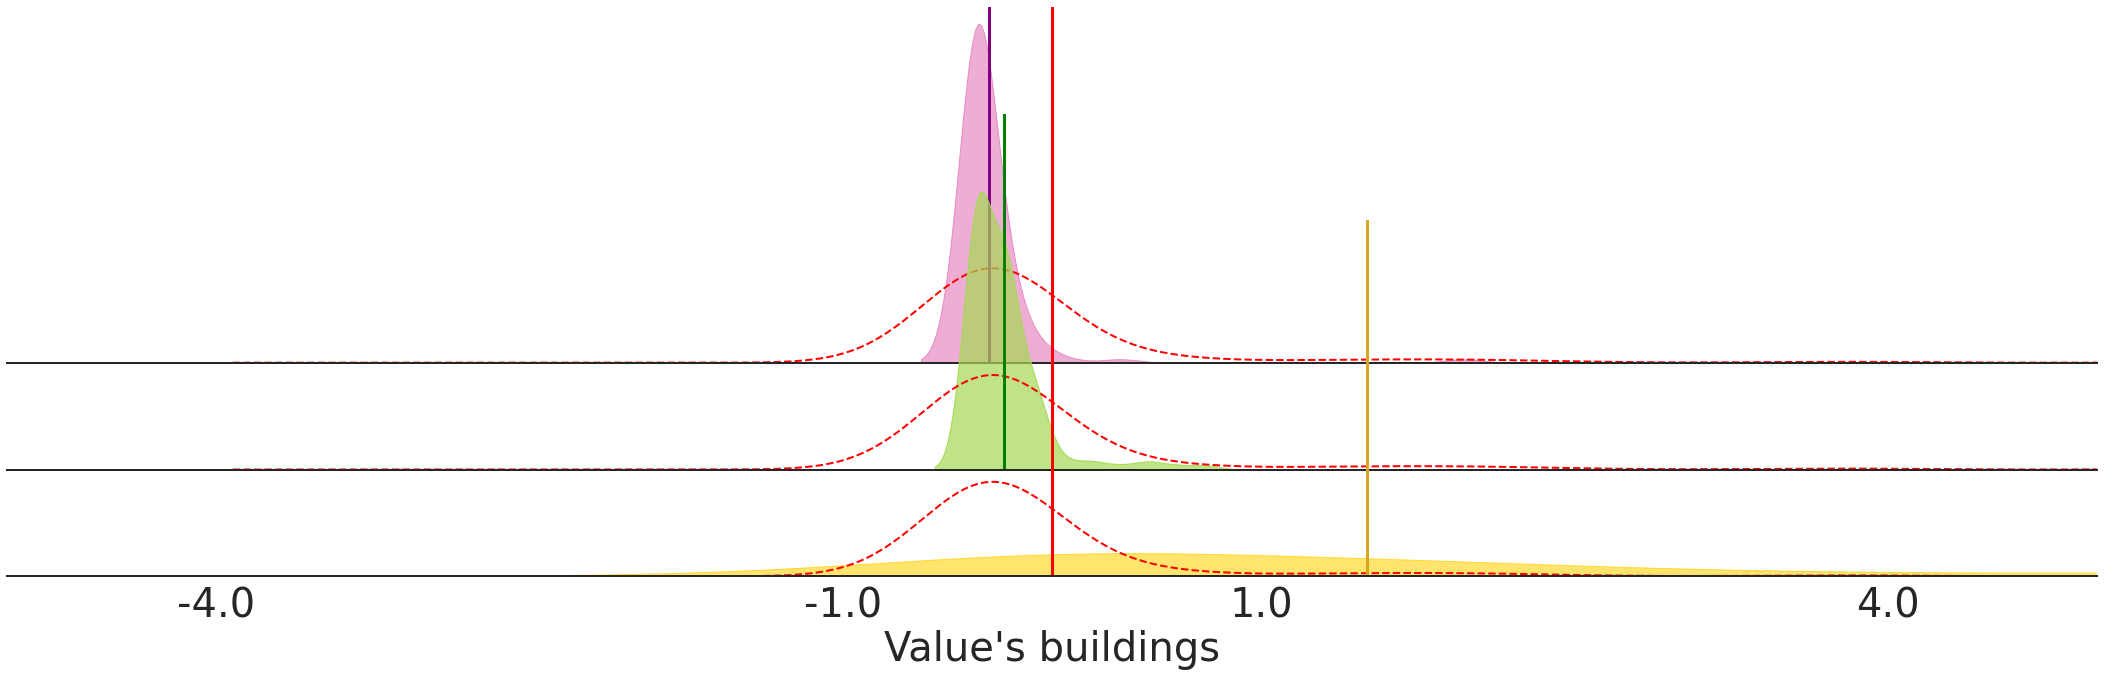

<Figure size 216x432 with 0 Axes>

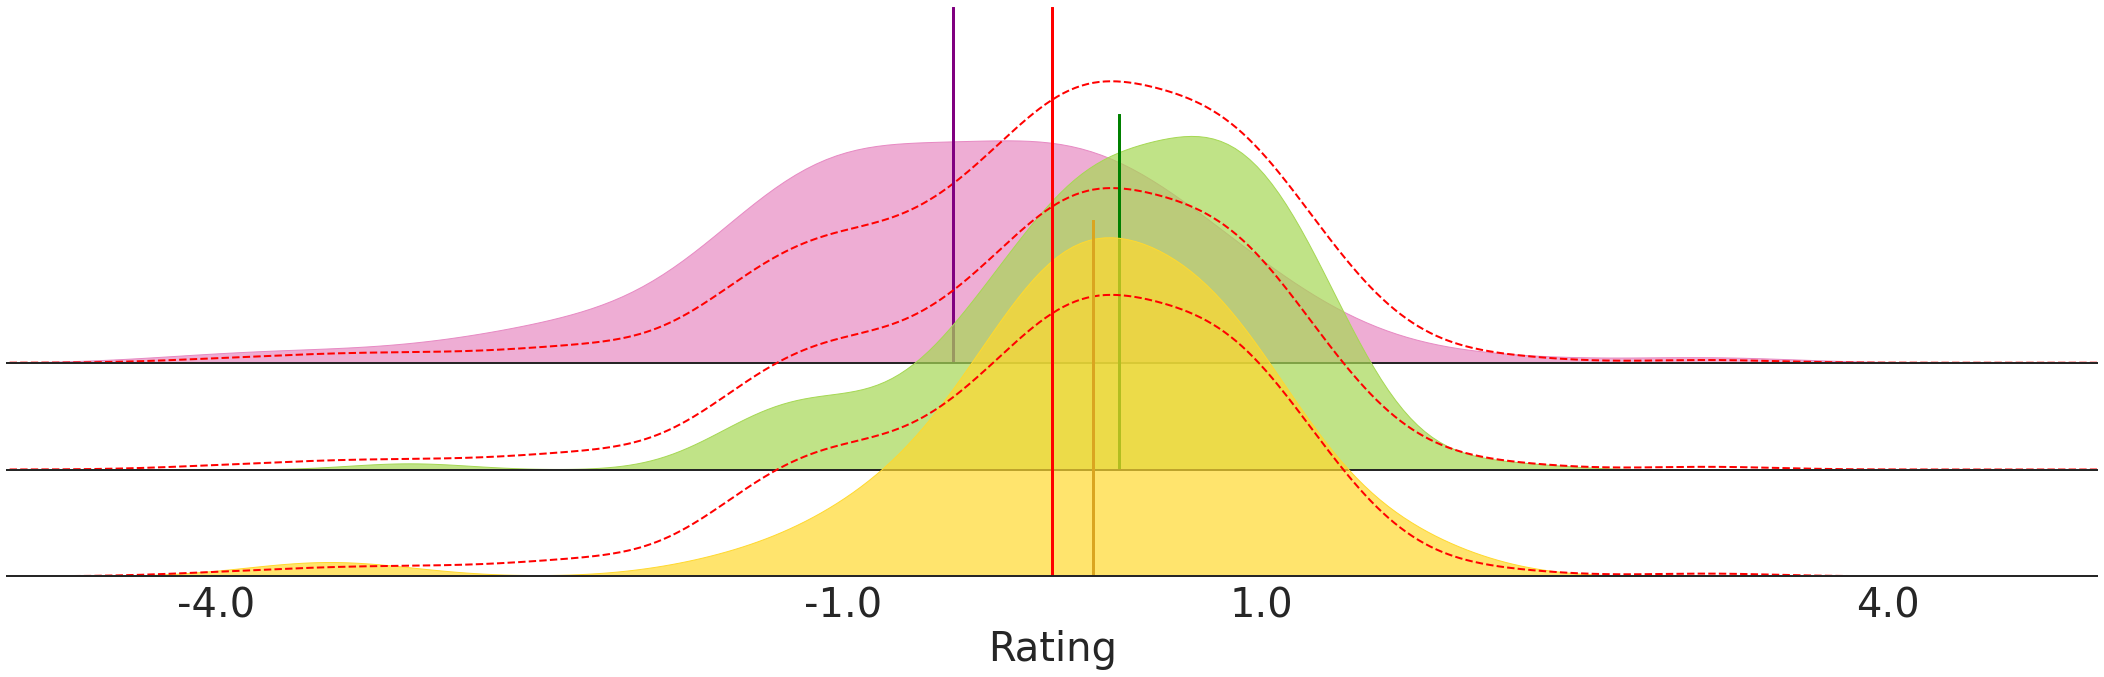

<Figure size 216x432 with 0 Axes>

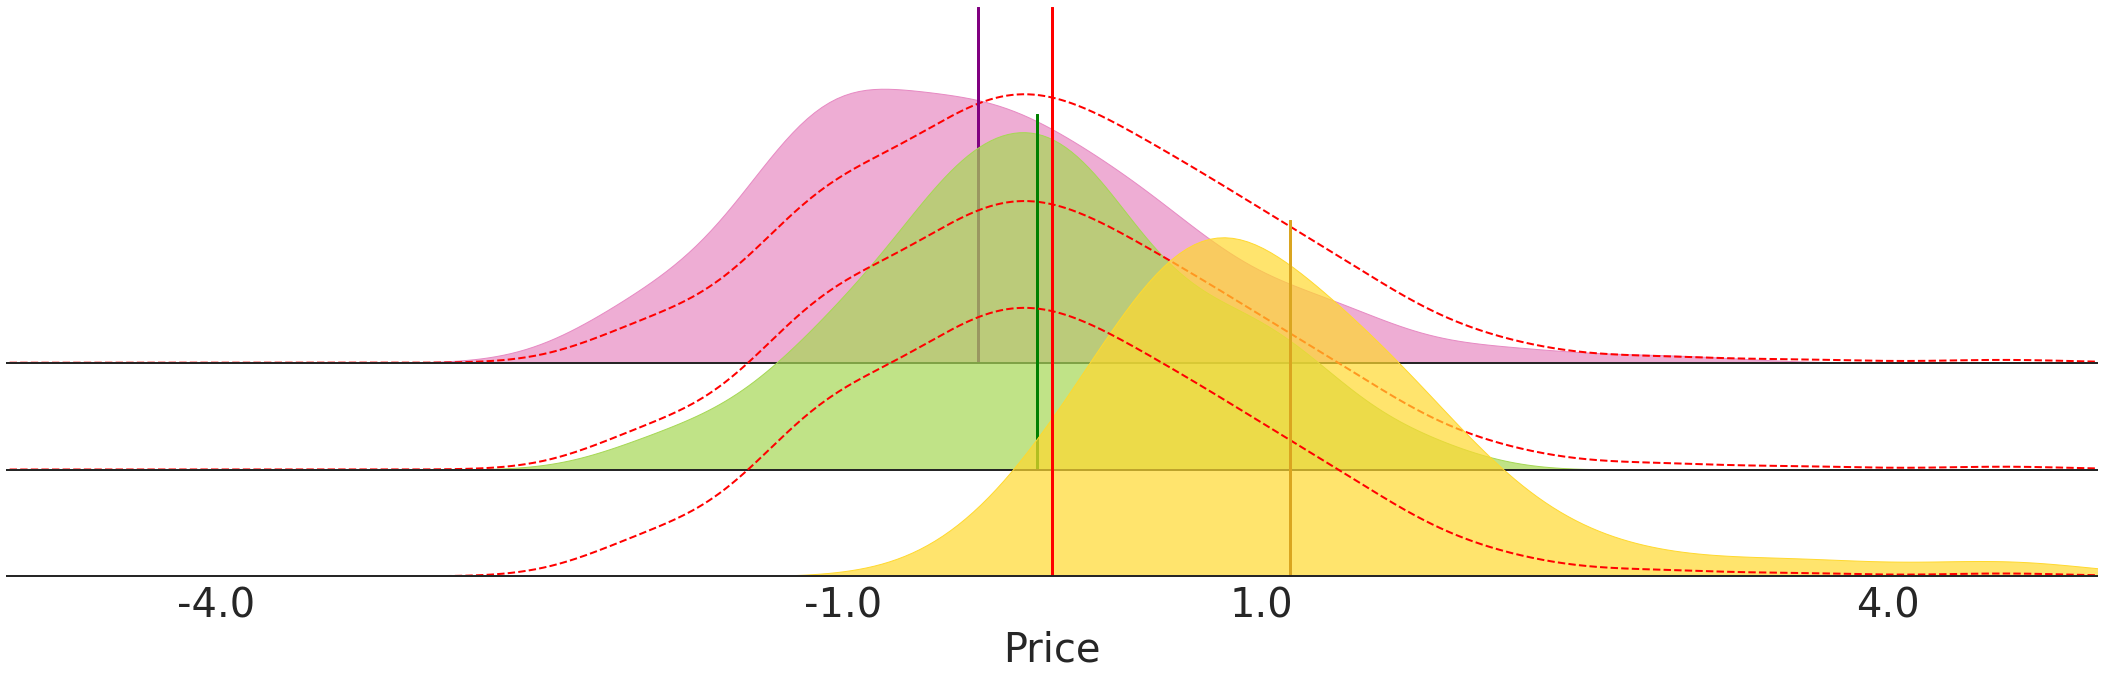

<Figure size 216x432 with 0 Axes>

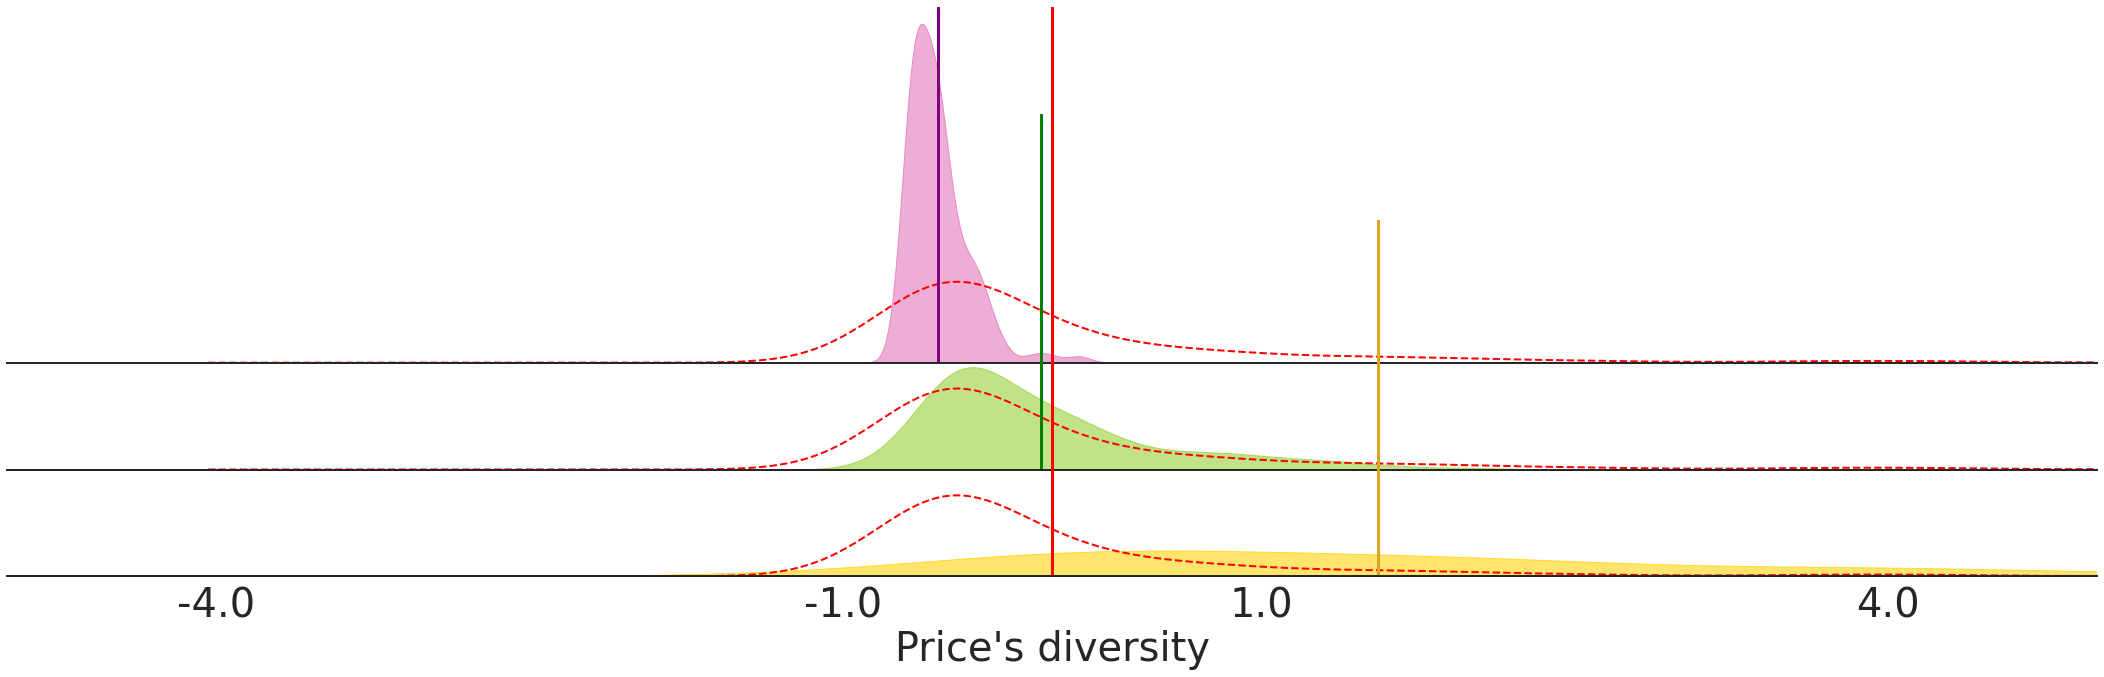

<Figure size 216x432 with 0 Axes>

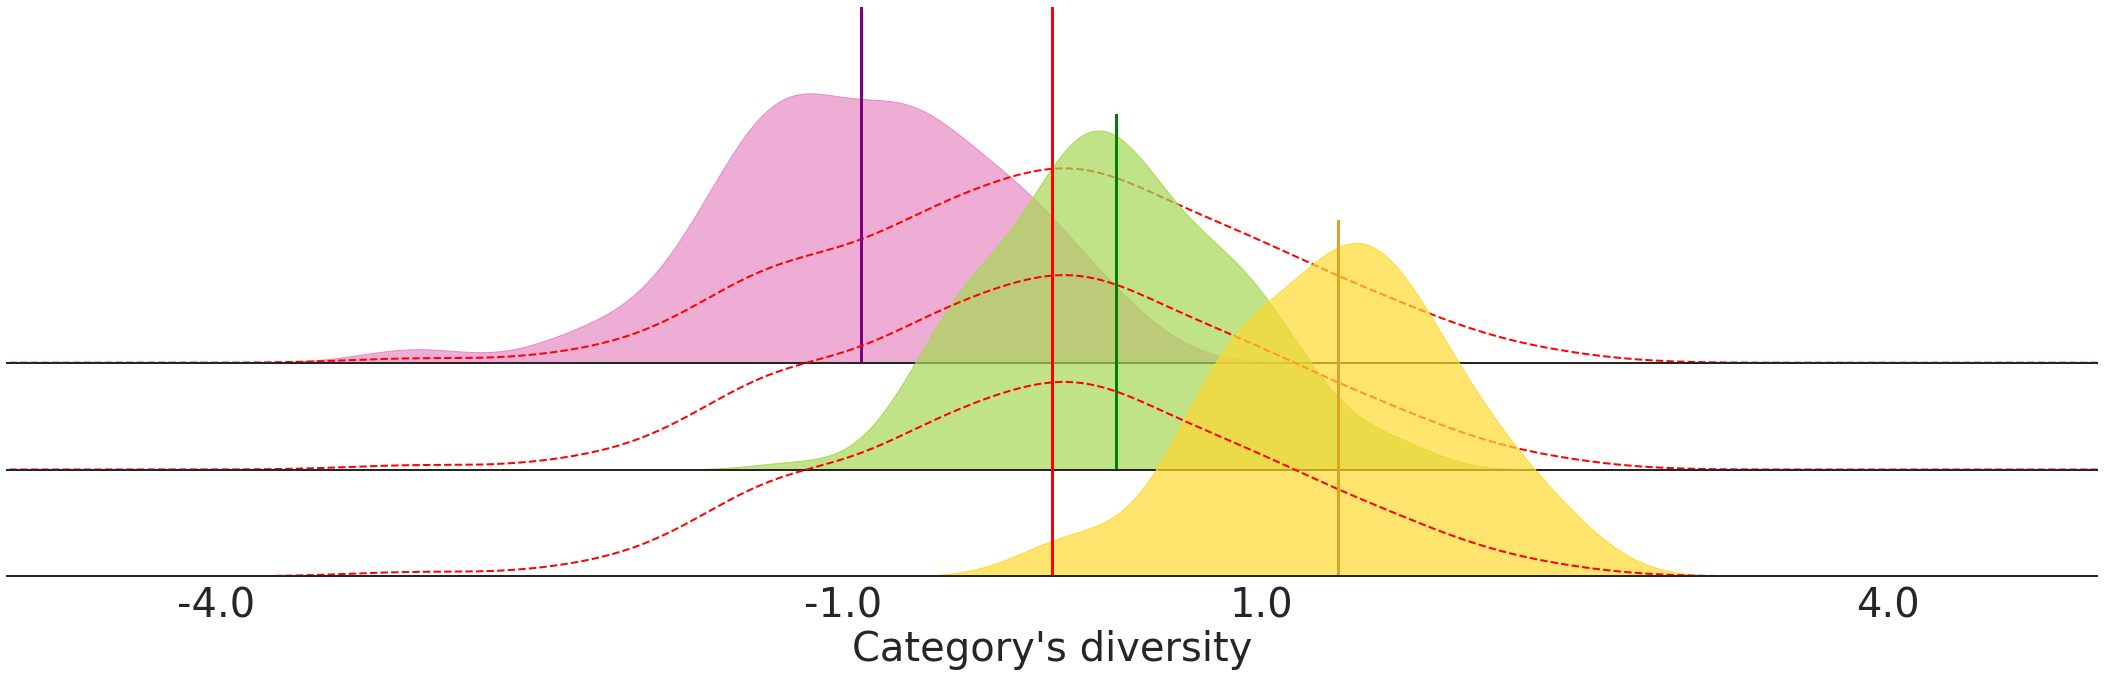

<Figure size 216x432 with 0 Axes>

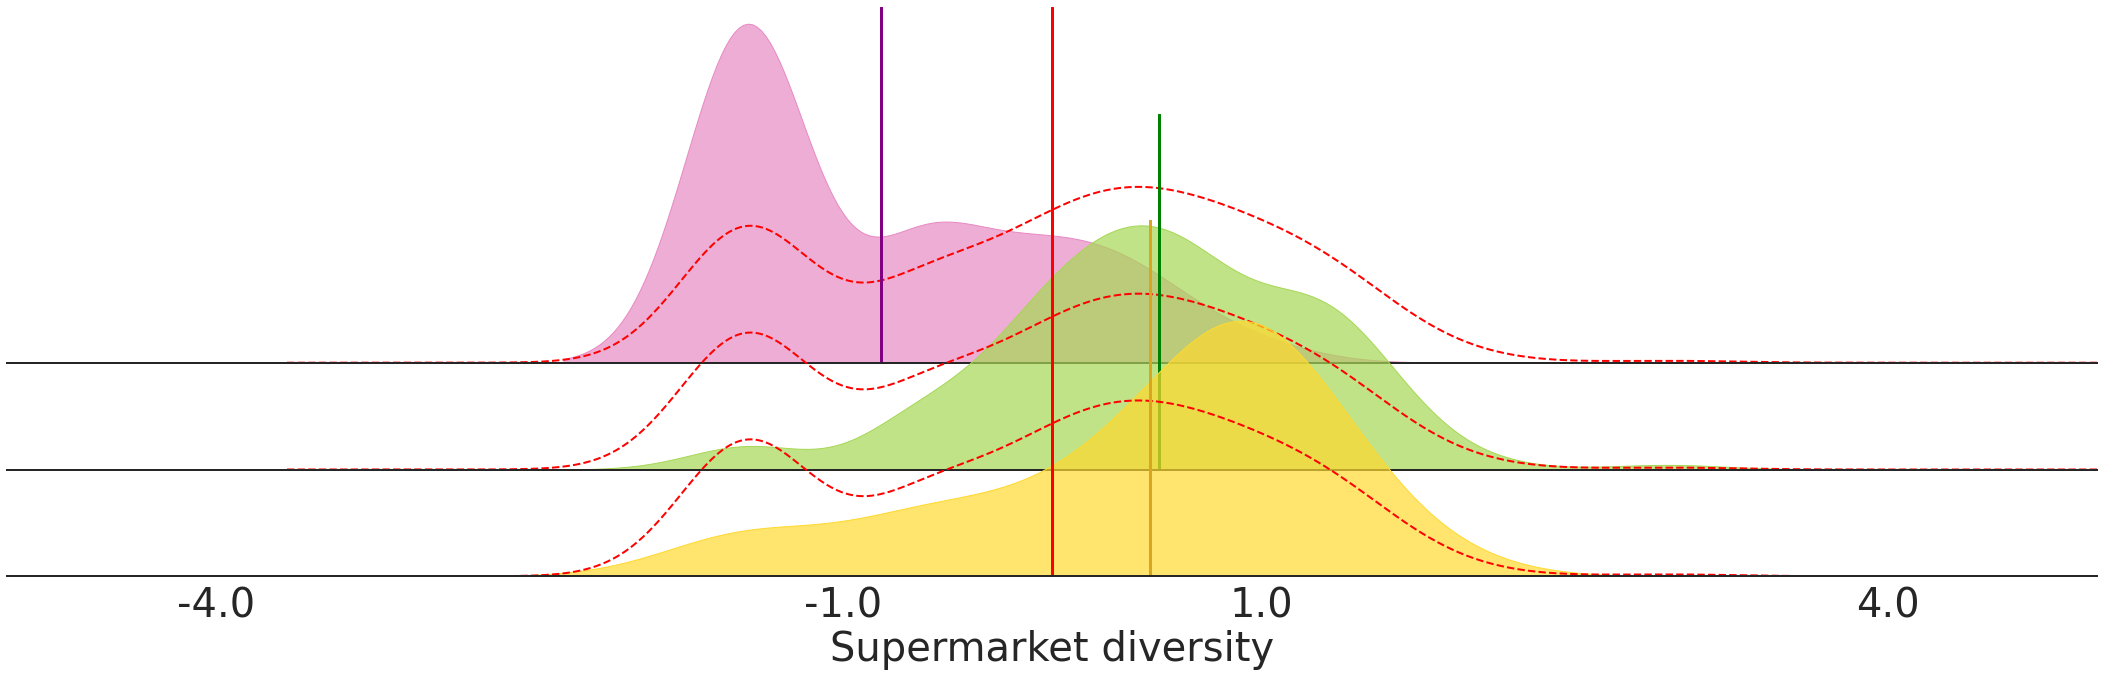

<Figure size 216x432 with 0 Axes>

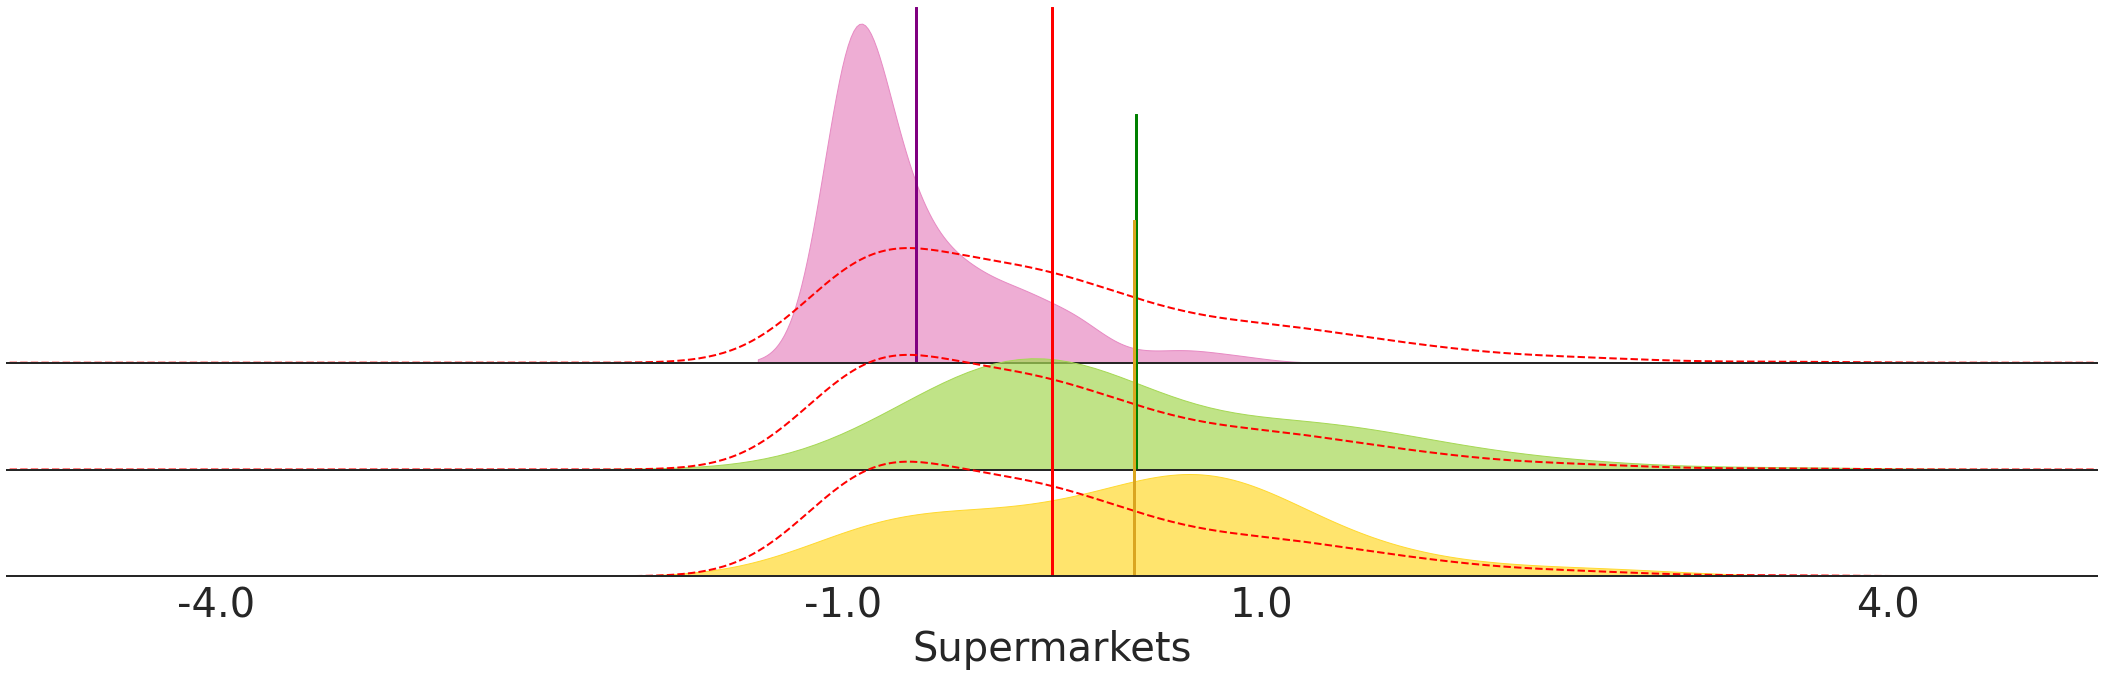

<Figure size 216x432 with 0 Axes>

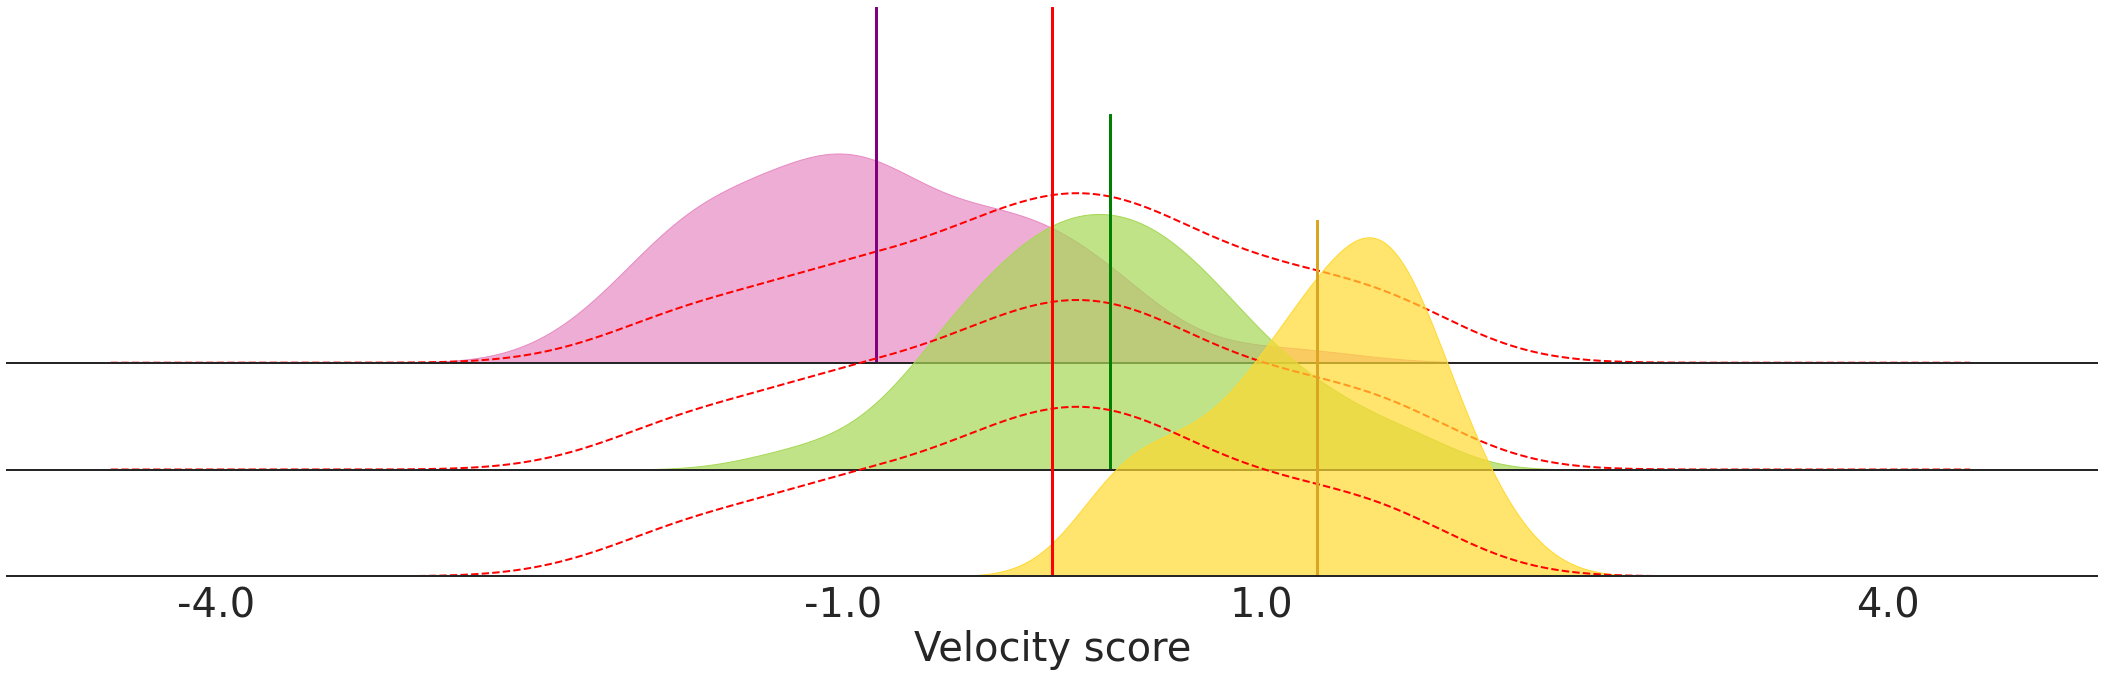

<Figure size 216x432 with 0 Axes>

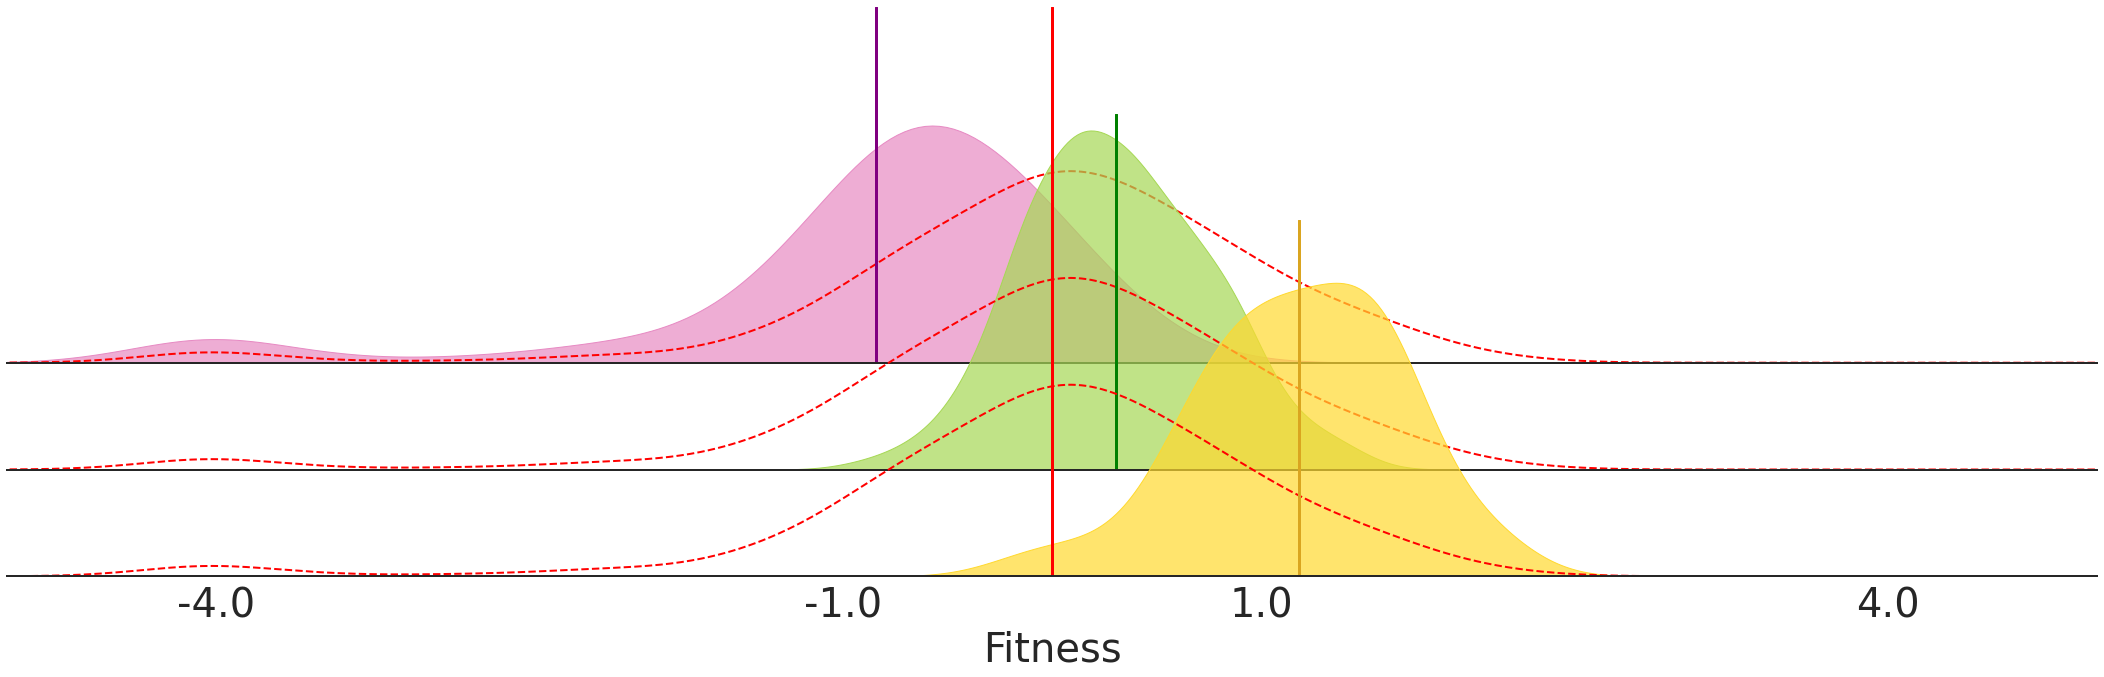

In [9]:


sns.set(font_scale=4) 
for f in range(len(f_visita)):


    fig = plt.figure(figsize=(3,6))
    
    
    sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':2})
    palette = sns.color_palette("Set2", 12).as_hex()[3:6]
    globals()[f'g_{f}'] = sns.FacetGrid(feature_data, palette=palette, row="cluster", hue="cluster", aspect=10)
    globals()[f'g_{f}'].map_dataframe(sns.kdeplot, x=f_visita[f], fill=True, alpha=0.7)

    for ax in globals()[f'g_{f}'].axes.flat:
        

        feature_data[f_visita[f]].plot.kde(ax= ax,color='red',lw=2,ls='--')
        rosso=feature_data[f_visita[f]].mean()

        ax.axvline(x=rosso,
                        color='red',label='mean',linestyle = "-",linewidth=3)
        
        globals()[f'g_{f}'].set_xlabels(VARIABLES_[f],size=40,x=rosso)



    line_position=[feature_data.query("cluster==0")[f_visita[f]].mean(),feature_data.query("cluster==1")[f_visita[f]].mean(),feature_data.query("cluster==2")[f_visita[f]].mean()]


    #line_color=['purple','green','goldenrod']
    for ax, pos,i in zip(globals()[f'g_{f}'].axes.flat, line_position,range(3)):
        ax.axvline(x=pos, color=line_color[i], linestyle='-',linewidth=3)
        

    globals()[f'g_{f}'].set_titles("")
    globals()[f'g_{f}']=globals()[f'g_{f}'].despine( left=True)

 
    tick=list(np.linspace(-4,4,4).round(0))
        
    globals()[f'g_{f}'].set(yticks=[], xlabel=VARIABLES_[f],ylabel='',xticks=tick)
    globals()[f'g_{f}'].set_xticklabels(tick,size=40)
    globals()[f'g_{f}'].set(xlim=[-5,5])
    globals()[f'g_{f}'].fig.subplots_adjust(hspace=-0.7)



In [10]:

class ComplexRadar():
    """
    Create a complex radar chart with different scales for each variable
    Parameters
    ----------
    fig : figure object
        A matplotlib figure object to add the axes on
    variables : list
        A list of variables
    ranges : list
        A list of tuples (min, max) for each variable
    n_ring_levels: int, defaults to 5
        Number of ordinate or ring levels to draw
    show_scales: bool, defaults to True
        Indicates if we the ranges for each variable are plotted
    format_cfg: dict, defaults to None
        A dictionary with formatting configurations
    """
    def __init__(self, fig, variables, ranges, n_ring_levels=5, show_scales=True, format_cfg=None):
        
        # Default formatting
        self.format_cfg = {
            # Axes
            # https://matplotlib.org/stable/api/figure_api.html
            'axes_args': {},
            # Tick labels on the scales
            # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.rgrids.html
            'rgrid_tick_lbls_args': {'fontsize':8},
            # Radial (circle) lines
            # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.grid.html
            'rad_ln_args': {},
            # Angle lines
            # https://matplotlib.org/3.2.2/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D
            'angle_ln_args': {},
            # Include last value (endpoint) on scale
            'incl_endpoint':False,
            # Variable labels (ThetaTickLabel)
            'theta_tick_lbls':{'va':'top', 'ha':'center'},
            'theta_tick_lbls_txt_wrap':15,
            'theta_tick_lbls_brk_lng_wrds':False,
            'theta_tick_lbls_pad':25,
            # Outer ring
            # https://matplotlib.org/stable/api/spines_api.html
            'outer_ring':{'visible':True, 'color':'#d6d6d6'}
        }
        
        if format_cfg is not None:
            self.format_cfg = { k:(format_cfg[k]) if k in format_cfg.keys() else (self.format_cfg[k]) 
                 for k in self.format_cfg.keys()}        
        
        
        # Calculate angles and create for each variable an axes
        # Consider here the trick with having the first axes element twice (len+1)
        angles = np.arange(0, 360, 360./len(variables))
        axes = [fig.add_axes([0.1,0.1,0.9,0.9], 
                             polar=True,
                             label = "axes{}".format(i),
                             **self.format_cfg['axes_args']) for i in range(len(variables)+1)]
        
        # Ensure clockwise rotation (first variable at the top N)
        for ax in axes:
            ax.set_theta_zero_location('N')
            ax.set_theta_direction(-1)
            ax.set_axisbelow(True)
        
        # Writing the ranges on each axes
        for i, ax in enumerate(axes):

            # Here we do the trick by repeating the first iteration
            j = 0 if (i==0 or i==1) else i-1
            ax.set_ylim(*ranges[j])
            # Set endpoint to True if you like to have values right before the last circle
            grid = np.linspace(*ranges[j], num=n_ring_levels, 
                               endpoint=self.format_cfg['incl_endpoint'])
            gridlabel = ["{}".format(round(x,2)) for x in grid]
            gridlabel[0] = "" # remove values from the center
            lines, labels = ax.set_rgrids(grid, 
                                          labels=gridlabel, 
                                          angle=angles[j],
                                          **self.format_cfg['rgrid_tick_lbls_args']
                                         )
            
            ax.set_ylim(*ranges[j])
            ax.spines["polar"].set_visible(False)
            ax.grid(visible=False)
            
            if show_scales == False:
                ax.set_yticklabels([])

        # Set all axes except the first one unvisible
        for ax in axes[1:]:
            ax.patch.set_visible(False)
            ax.xaxis.set_visible(False)
            
        # Setting the attributes
        self.angle = np.deg2rad(np.r_[angles, angles[0]])
        self.ranges = ranges
        self.ax = axes[0]
        self.ax1 = axes[1]
        self.plot_counter = 0
        
        
        # Draw (inner) circles and lines
        self.ax.yaxis.grid(**self.format_cfg['rad_ln_args'])
        # Draw outer circle
        self.ax.spines['polar'].set(**self.format_cfg['outer_ring'])
        # Draw angle lines
        self.ax.xaxis.grid(**self.format_cfg['angle_ln_args'])

        # ax1 is the duplicate of axes[0] (self.ax)
        # Remove everything from ax1 except the plot itself
        self.ax1.axis('off')
        self.ax1.set_zorder(9)
        
        # Create the outer labels for each variable
        l, text = self.ax.set_thetagrids(angles, labels=variables)
        
        # Beautify them
        labels = [t.get_text() for t in self.ax.get_xticklabels()]
        labels = ['\n'.join(textwrap.wrap(l, self.format_cfg['theta_tick_lbls_txt_wrap'], 
                                          break_long_words=self.format_cfg['theta_tick_lbls_brk_lng_wrds'])) for l in labels]
        self.ax.set_xticklabels(labels, **self.format_cfg['theta_tick_lbls'])
        
        for t,a in zip(self.ax.get_xticklabels(),angles):
            if a == 0:
                t.set_ha('center')
            elif a > 0 and a < 180:
                t.set_ha('left')
            elif a == 180:
                t.set_ha('center')
            else:
                t.set_ha('right')

        self.ax.tick_params(axis='both', pad=self.format_cfg['theta_tick_lbls_pad'])


    def _scale_data(self, data, ranges):
        """Scales data[1:] to ranges[0]"""
        for d, (y1, y2) in zip(data[1:], ranges[1:]):
            assert (y1 <= d <= y2) or (y2 <= d <= y1)
        x1, x2 = ranges[0]
        print(x1)
        d = data[0]
        sdata = [d]
        for d, (y1, y2) in zip(data[1:], ranges[1:]):
            sdata.append((d-y1) / (y2-y1) * (x2 - x1) + x1)
        return sdata
        
    def plot(self, data, *args, **kwargs):
        """Plots a line"""
        sdata = self._scale_data(data, self.ranges)
        print(sdata)
        self.ax1.plot(self.angle, np.r_[sdata, sdata[0]], *args, **kwargs)
        self.plot_counter = self.plot_counter+1
        
    def line(self, data, *args, **kwargs):
        sdata = self._scale_data(data, self.ranges)
        #print(sdata)
        #print(sdata)
        for i in range(10):
            #ax.axvline(x=ANGLES[i], ymax=all_f.drop(['cluster','grid_id','geometry'],axis=1).mean()[i],
            #self.ax1.axvline(self.angle[i], ymax=data[i], color='red', lw=5, alpha=1,label='all')
            self.ax1.axvline(self.angle[i], ymax=np.r_[sdata, sdata[0]][i], color='red', lw=2, alpha=1,label='all')
            self.plot_counter = self.plot_counter+1
        
        
    
    def fill(self, data, *args, **kwargs):
        """Plots an area"""
        sdata = self._scale_data(data, self.ranges)
        self.ax1.fill(self.angle, np.r_[sdata, sdata[0]], *args, **kwargs)
        
    def use_legend(self, *args, **kwargs):
        """Shows a legend"""
        self.ax1.legend(*args, **kwargs)
    
    def set_title(self, title, pad=25, **kwargs):
        """Set a title"""
        self.ax.set_title(title,pad=pad, **kwargs)


In [11]:
ex_radar=feature_data.copy()
data=feature_data.drop(['grid_id','geometry'],axis=1)
result = data.groupby(['cluster']).mean()

In [12]:
max_va=data.query("cluster==2").drop("cluster",axis=1).describe().T[['mean']]
max_va['max']= max_va['mean'].apply(lambda x: math.ceil(x))+1

min_va=data.query("cluster==0").drop("cluster",axis=1).describe().T[['mean']]
min_va['min']= min_va['mean'].apply(lambda x: int(x))-1

min_max_per_variable=pd.concat([min_va[['min']],max_va[['max']]],axis=1)

-1
[-0.12779529086828173, -0.4753975655703264, -0.4750286044187235, -0.5158678899248518, -0.6586399186022136, -0.9358611929345767, -0.820208850335303, -0.6539098574255564, -0.882256819319252, -0.8833634273244504]
-1
[-0.12779529086828173, -0.4753975655703264, -0.4750286044187235, -0.5158678899248518, -0.6586399186022136, -0.9358611929345767, -0.820208850335303, -0.6539098574255564, -0.882256819319252, -0.8833634273244504]
-1
[0.038652701747749776, -0.42501126242651566, 0.3187460542213363, -0.30614727258307517, -0.29081333050930547, -0.02304967557617532, 0.5093579471094172, 0.4010981056978813, -0.0426691050328063, -0.021007906581444358]
-1
[0.038652701747749776, -0.42501126242651566, 0.3187460542213363, -0.30614727258307517, -0.29081333050930547, -0.02304967557617532, 0.5093579471094172, 0.4010981056978813, -0.0426691050328063, -0.021007906581444358]
-1
[0.2023642299221202, 0.8787643366521627, 0.19655266957990136, 0.6044357590942755, 0.9189047115395117, 0.7741524392927621, 0.46952554807

/tmp/ipykernel_18224/4024688052.py:22: FutureWarning: The default value of numeric_only in GeoDataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  radar.plot(ex_radar.drop(['cluster','grid_id'],axis=1).mean().values, label='all', color='red')
/tmp/ipykernel_18224/4024688052.py:24: FutureWarning: The default value of numeric_only in GeoDataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  radar.line(ex_radar.drop(['cluster','grid_id'],axis=1).mean().values)


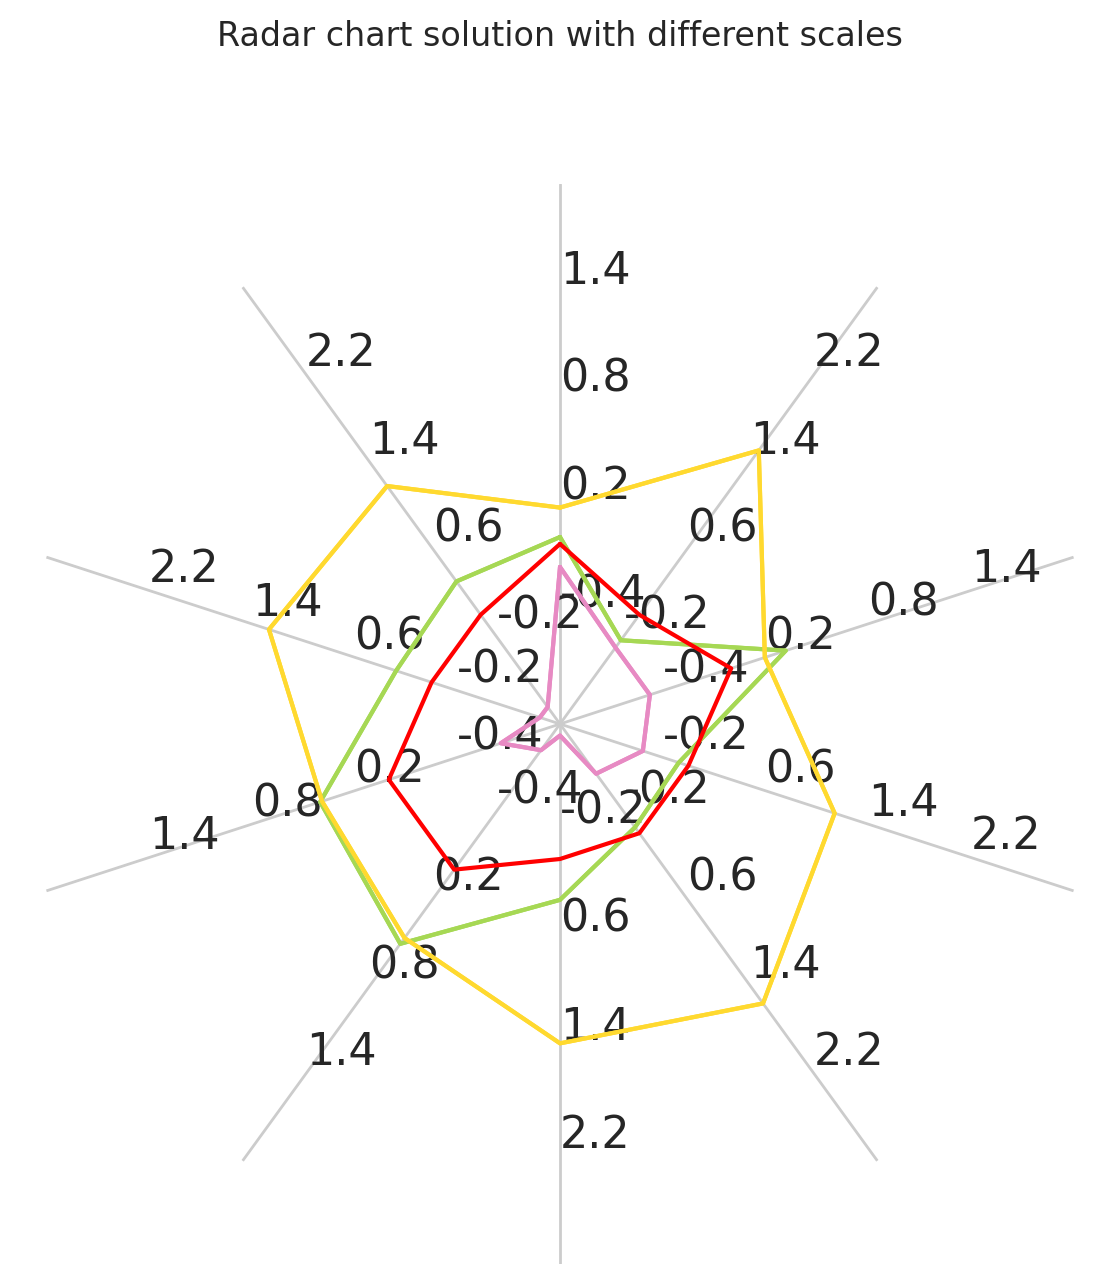

In [13]:


variables = VARIABLES_
variables=[''] * len(VARIABLES_)
ranges = list(min_max_per_variable.itertuples(index=False, name=None))   

format_cfg = {
    'rad_ln_args': {'visible':False},
    'outer_ring': {'visible':False},
    'rgrid_tick_lbls_args': {'fontsize':16},
    'theta_tick_lbls': {'fontsize':49},
    'theta_tick_lbls_pad':15
}

fig1 = plt.figure(figsize=(6, 6), dpi=200)
radar = ComplexRadar(fig1, variables, ranges, show_scales=True, format_cfg=format_cfg)

custom_colors = palette
for g,c in zip(result.index, custom_colors):

    radar.plot(result.loc[g].values, label=f"cluster {g}", color=c)
    radar.plot(result.loc[g].values, label="", color=c)
    
radar.plot(ex_radar.drop(['cluster','grid_id'],axis=1).mean().values, label='all', color='red')
    
radar.line(ex_radar.drop(['cluster','grid_id'],axis=1).mean().values)

radar.set_title("Radar chart solution with different scales",pad=50)


